# The goal is to tain and agent using Q-Learning to navigate FrozenLake.
# Agent must learn to navigate to the end to maximize rewards
# ENVIRONMENT IN USE - Frozenlake Environment. so we want to see how we can train the object to come from one end of the frozeen lake to the other without falling. There is a reward for whatever outcome be it positive or negative. If the object safely gets to its destination without falling, it is rewarded if it falls into any hole, it is purnished.

In [24]:
%pip install numpy gym matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns

Episode 0: Total Reward = -5.0, Success Rate = 0.00
Episode 1000: Total Reward = 10.0, Success Rate = 0.67
Episode 2000: Total Reward = 10.0, Success Rate = 0.83
Episode 3000: Total Reward = 10.0, Success Rate = 0.89
Episode 4000: Total Reward = 10.0, Success Rate = 0.91


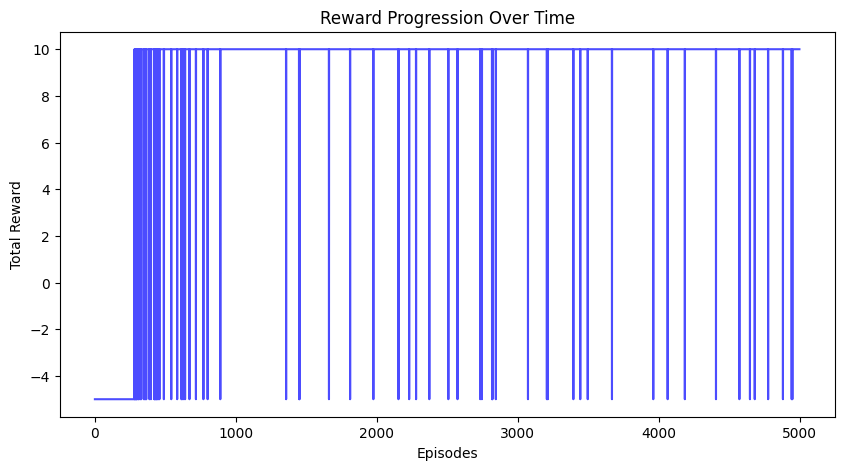

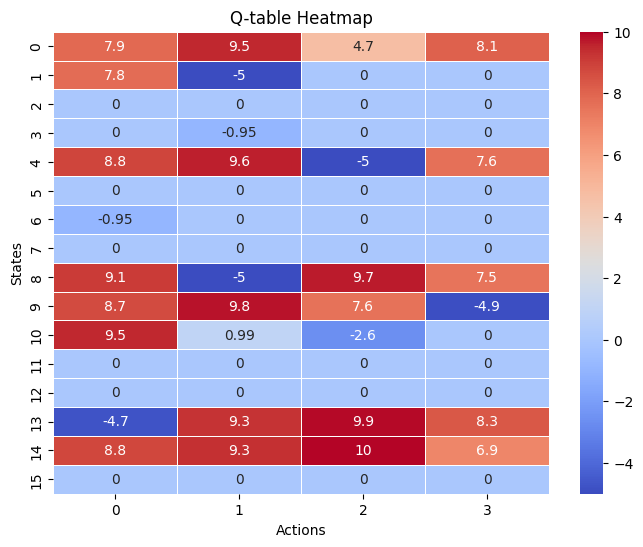

Agent Navigation:

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG



In [26]:

# Create FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q_table = np.zeros((state_size, action_size))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 5000
max_steps = 100

reward_list = []
success_count = 0

for episode in range(episodes):
    state, _ = env.reset()       # Reset environment at start of episode
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Choose action (explore or exploit)
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state])

        # Take action and observe next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Reward shaping
        if done and reward == 1:
            reward = 10
            success_count += 1
        elif done and reward == 0:
            reward = -5

        # Update Q-table using Q-learning formula
        Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + \
                                 learning_rate * (reward + discount_factor * np.max(Q_table[next_state]))

        total_reward += reward
        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    reward_list.append(total_reward)

    if episode % 1000 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}, Success Rate = {success_count / (episode + 1):.2f}")

# Plot rewards over episodes
plt.figure(figsize=(10, 5))
plt.plot(reward_list, color="blue", alpha=0.7)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Progression Over Time")
plt.show()

# Plot Q-table heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Q_table, annot=True, cmap="coolwarm", linewidth=0.5)
plt.xlabel("Actions")
plt.ylabel("States")
plt.title("Q-table Heatmap")
plt.show()

# Test the trained agent
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")
state, _ = env.reset()
done = False

print("Agent Navigation:\n")
while not done:
    action = np.argmax(Q_table[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    print(env.render())
env.close()

# S - START
# F - SAFE ROUTE (REWARDED)
# H - HOLE (PUNISHED)
# G - THE END